# Forecasting Lottery Numbers

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.pyplot import figure
import seaborn as sns

In [87]:
df = pd.read_csv("powerball_numbers.csv")
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset has 142 rows and 9 columns.


In [88]:
df.index=df['date']
df=df.drop(['date'], axis=1)

In [89]:
df=df.iloc[::-1]

In [90]:
df

,num1,num2,num3,num4,num5,num6,num7,num8
date,,,,,,,,
19/04/2018,4,5,9,13,25,32,33,7
26/04/2018,9,14,15,19,24,34,35,12
3/05/2018,1,3,6,16,19,20,24,13
10/05/2018,6,14,15,24,26,32,35,14
17/05/2018,3,9,16,25,26,31,34,9
...,...,...,...,...,...,...,...,...
3/12/2020,1,12,15,17,21,28,29,17
10/12/2020,4,8,9,11,14,19,20,19
17/12/2020,4,5,9,16,17,29,33,13


## Adding Analytical Figures

- Sequential Pairs (SP): denotes how many pairs of sequential numbers are there in a particular draw, e.g. the draw (10, 11, 20, 27, 28, 30, 31) has an SP of 3, being (10, 11), (27, 28) and (30, 31).
- Odd Even Ratio (OE): denotes the ratio of odd and even numbers in a draw, e.g. the draw (10, 11, 20, 27, 28, 30, 31) has an OE of 3:4, there are 3 odd numbers and 4 even numbers.
- Small Big Ratio (SB): denotes the ratio of numbers that belong to upper half and lower half, within the possible number range. e.g. PowerBall has a range of 1 to 35 for its main matrix, so let’s say Small range is 1-17 and Big range is 18-35, thus the draw (10, 11, 20, 27, 28, 30, 31) has a BS of 5:2
- Three Partition Ratio (3P): dividing the range of possible numbers into three partitions, for PowerBall, they are 1-12, 13-24 and 25-35, 3P denotes the number of balls that belong to each partition. For the draw (10, 11, 20, 27, 28, 30, 31), its 3P is 214.
- Head Tail Distance (HTD): the distance between the smallest number and the largest number in a single draw, for the draw (10, 11, 20, 27, 28, 30, 31), its HTD is 21.


- Arithmetic Complexity (AC): the complexity of a draw, it’s calculated in such a way:


1. Calculate the absolute difference between every two numbers in a draw.
2. Eliminate the same numbers from result of 1, let D be the remaining number of differences.
3. AC = D - (r - 1), r is the number of numbers in a draw

In [91]:
df['numString'] = df.values.tolist()

## Adding Sequential Pairs

In [92]:
sequential_pairs=[]

for prac in df['numString'].tolist():
    consec = []
    del prac[-1]
    for k in prac:
        for j in prac:
            if j==k:
                continue
            elif k+1==j or k-1==j:
                temp=[k,j]
                temp=tuple(sorted(temp))
                consec.append(temp)
    sequential_pairs.append(len(set(consec)))

In [93]:
df['SP']=sequential_pairs

### Adding Odd-Even Ratio

In [94]:
OE_list = []
for prac in df['numString'].tolist():
    even_count=0
    odd_count=0
    for k in prac:
        if k%2 ==0:
            even_count+=1
        else:
            odd_count+=1
    OE_ratio=odd_count/even_count
    OE_list.append(OE_ratio)

In [95]:
df['OE']=OE_list

### Adding Small-Big Ratio

In [96]:
SB_list = []
for prac in df['numString'].tolist():
    small_count=0
    big_count=0
    for k in prac:
        if k<18:
            small_count+=1
        else:
            big_count+=1
    try:
        SB_ratio=small_count/big_count
    except:
        SB_ratio=7
    SB_list.append(SB_ratio)

In [97]:
df['SB']=SB_list

### Adding 3-Partition Count

In [98]:
P1_list = []
P2_list = []
P3_list = []
for prac in df['numString'].tolist():
    small_count=0
    mid_count=0
    big_count=0
    for k in prac:
        if k<13:
            small_count+=1
        elif k>12 and k<25:
            mid_count+=1
        else:
            big_count+=1
    P1_list.append(small_count)
    P2_list.append(mid_count)
    P3_list.append(big_count)

In [99]:
df['P1']=P1_list
df['P2']=P2_list
df['P3']=P3_list

### Adding Head-Tail Distance

In [100]:
df['HTD']=df['num7']-df['num1']

### Adding Arithmetic Complexity

In [101]:
AC_list = []
for prac in df['numString'].tolist():
    diff_list = []
    for k in prac:
        for j in prac:
            if j==k:
                continue
            else:
                diff=abs(k-j)
                diff_list.append(diff)

    diff_list=set(diff_list)
    diff_length=len(diff_list)
    ac_value= diff_length-6
    AC_list.append(ac_value)

In [102]:
df['AC']=AC_list

In [103]:
df

,num1,num2,num3,num4,num5,num6,num7,num8,numString,SP,OE,SB,P1,P2,P3,HTD,AC
date,,,,,,,,,,,,,,,,,
19/04/2018,4,5,9,13,25,32,33,7,"[4, 5, 9, 13, 25, 32, 33]",2,2.500000,1.333333,3,1,3,29,10
26/04/2018,9,14,15,19,24,34,35,12,"[9, 14, 15, 19, 24, 34, 35]",2,1.333333,0.750000,1,4,2,26,8
3/05/2018,1,3,6,16,19,20,24,13,"[1, 3, 6, 16, 19, 20, 24]",1,0.750000,1.333333,3,4,0,23,10
10/05/2018,6,14,15,24,26,32,35,14,"[6, 14, 15, 24, 26, 32, 35]",1,0.400000,0.750000,1,3,3,29,9
17/05/2018,3,9,16,25,26,31,34,9,"[3, 9, 16, 25, 26, 31, 34]",1,1.333333,0.750000,2,1,4,31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/12/2020,1,12,15,17,21,28,29,17,"[1, 12, 15, 17, 21, 28, 29]",1,2.500000,1.333333,2,3,2,28,12
10/12/2020,4,8,9,11,14,19,20,19,"[4, 8, 9, 11, 14, 19, 20]",2,0.750000,2.500000,4,3,0,16,8
17/12/2020,4,5,9,16,17,29,33,13,"[4, 5, 9, 16, 17, 29, 33]",2,2.500000,2.500000,3,2,2,29,9


In [104]:
sorted(df['num8'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [105]:
sequential_pairs=[]
prac=[4, 5, 9, 13, 25, 32, 33]

AC_list = []
diff_list = []
for k in prac:
    for j in prac:
        if j==k:
            continue
        else:
            diff=abs(k-j)
            diff_list.append(diff)

diff_list=set(diff_list)
diff_length=len(diff_list)
ac_value= diff_length-6
AC_list.append(ac_value)

AC_list



[10]

In [106]:
len(np.where((df['num1'] == 1))[0])

#df['SP']=df[]

28

## Explorartory Data Analysis

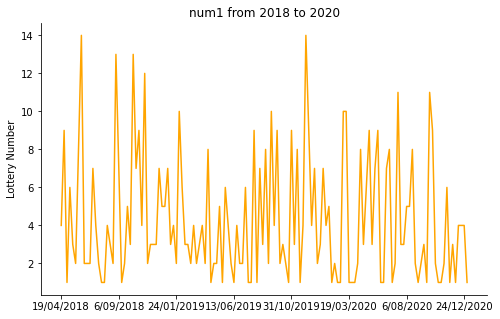

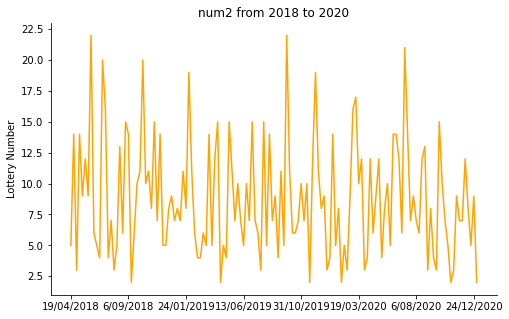

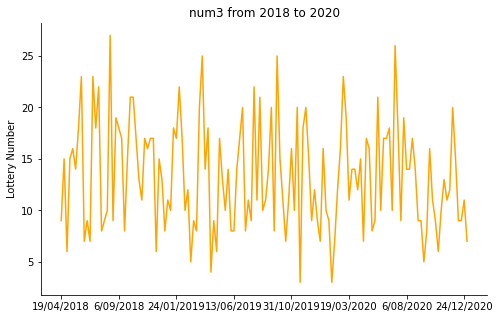

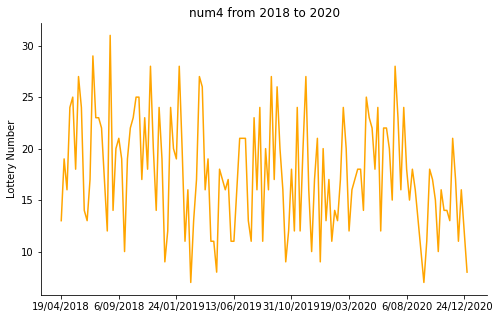

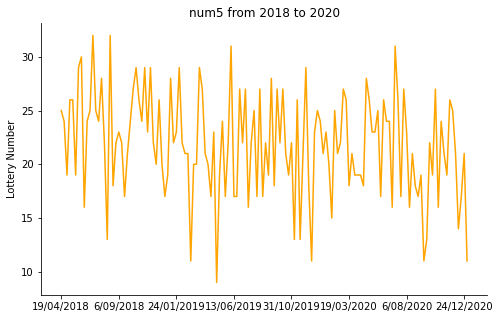

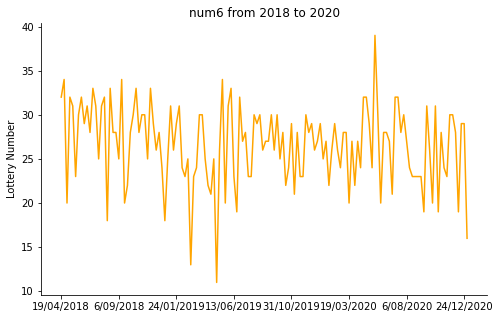

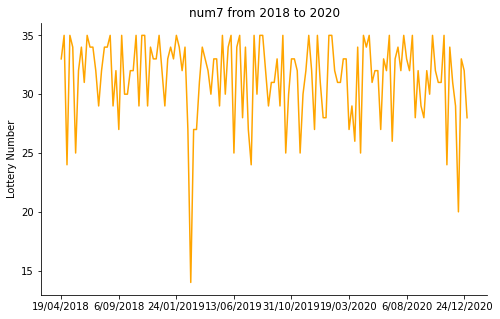

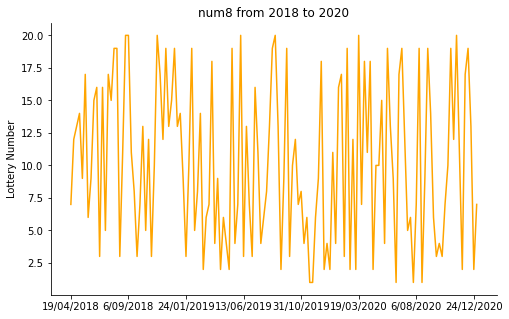

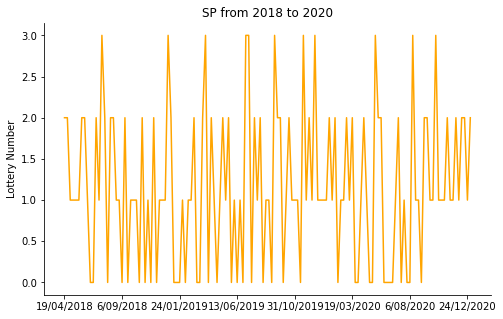

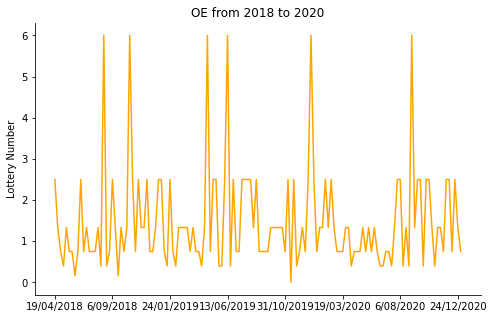

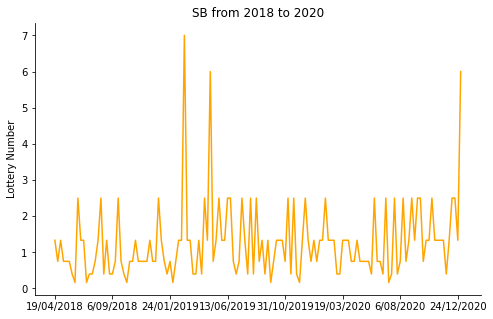

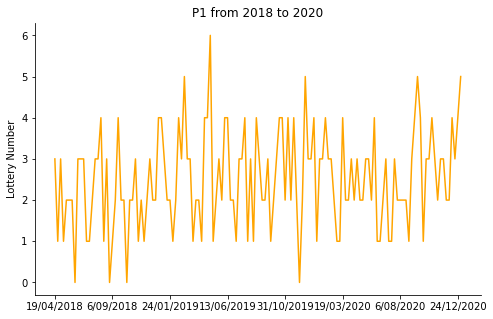

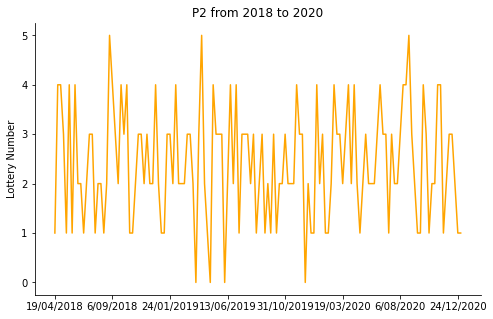

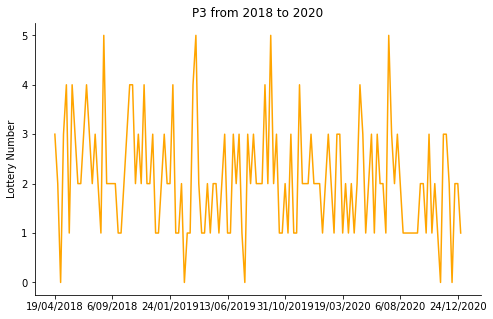

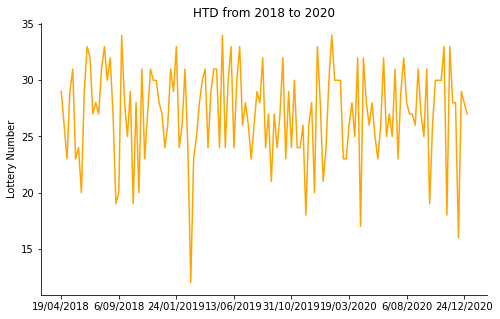

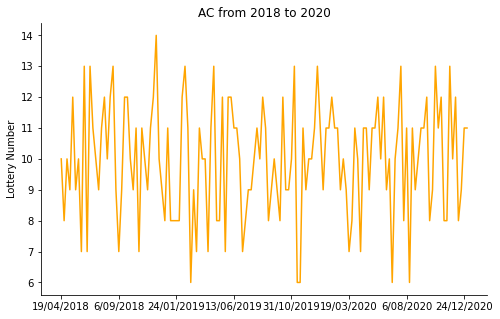

In [107]:
cols = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'SP', 'OE', 'SB', 'P1', 'P2', 'P3', 'HTD', 'AC']

for i in cols:
    y=df[i]
    fig, ax= plt.subplots(figsize=(8,5))
    y.plot(color='orange')
    ax.set_xlabel('')
    ax.set_ylabel('Lottery Number')
    ax.set_title(f'{i} from 2018 to 2020')
    ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
    sns.despine()
    plt.show()

## Assumption Checks

### Stationarity

In [108]:
# REFERENCE: https://towardsdatascience.com/simple-multivariate-time-series-forecasting-7fa0e05579b2

# Splitting the dataset into train & test subsets
n_obs = 120
df_train, df_test = df[:-n_obs], df[-(n_obs)+142:]

# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")


for i in cols:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(df_train[i])
    print('\n')

Column:  num1
--------------------------------------
Test Statistic          -4.213155
p-value                  0.000626
# Lags                   0.000000
# Observations          21.000000
Critical Value (1%)     -3.788386
Critical Value (5%)     -3.013098
Critical Value (10%)    -2.646397
dtype: float64

Series is Stationary


Column:  num2
--------------------------------------
Test Statistic          -5.070713
p-value                  0.000016
# Lags                   0.000000
# Observations          21.000000
Critical Value (1%)     -3.788386
Critical Value (5%)     -3.013098
Critical Value (10%)    -2.646397
dtype: float64

Series is Stationary


Column:  num3
--------------------------------------
Test Statistic           0.646952
p-value                  0.988718
# Lags                   9.000000
# Observations          12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64

Series is Non-Stationary


Column

Some of the features we intend to use in the model appear to be non-stationary and will be taken into consideration in the final conclusion of the results.

In [109]:
df_train=df_train.drop(['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8','numString'], axis=1)
df_test=df_test.drop(['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8','numString'], axis=1)

df_new=df.copy()
df_new=df_new.drop(['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8','numString'], axis=1)

## Modelling

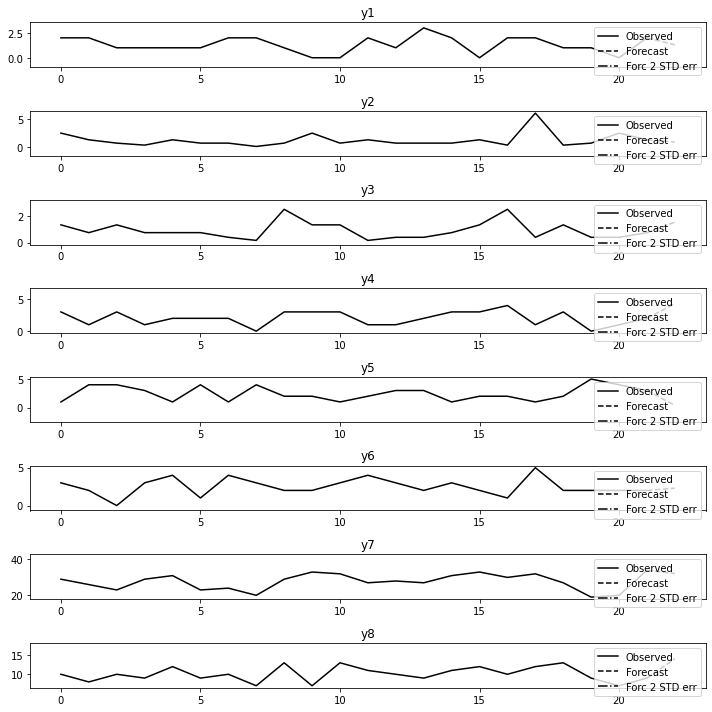

In [111]:
# Fitting the VAR model to the 2nd Differenced Data
from statsmodels.tsa.api import VAR

model = VAR(np.asarray(df_train))
results = model.fit()
results.summary()

# Forecasting for 100 steps ahead
lag_order = results.k_ar
predicted = results.forecast(df_train.values[-lag_order:], n_obs)
forecast = pd.DataFrame(predicted, index = df_new.index[-(n_obs)+142:], columns = df_new.columns)

# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [115]:
forecast

,SP,OE,SB,P1,P2,P3,HTD,AC
date,,,,,,,,
20/09/2018,1.297680,0.931300,1.538501,4.296467,0.403582,2.299951,32.143624,14.044348
27/09/2018,1.648640,0.898096,0.421586,1.033781,3.058612,2.907607,25.916753,9.024129
4/10/2018,1.281448,0.959630,1.002715,2.259625,2.442814,2.297561,27.153139,10.608243
11/10/2018,1.344676,1.206420,0.799968,1.745534,2.700015,2.554451,26.980036,9.684162
18/10/2018,1.281634,1.157187,0.950686,2.103699,2.466430,2.429871,27.652583,10.296284
...,...,...,...,...,...,...,...,...
3/12/2020,1.306429,1.166369,0.905329,2.017312,2.507225,2.475463,27.538675,10.156044
10/12/2020,1.306429,1.166369,0.905329,2.017312,2.507225,2.475463,27.538675,10.156044
17/12/2020,1.306429,1.166369,0.905329,2.017312,2.507225,2.475463,27.538675,10.156044


In [116]:
df_new

,SP,OE,SB,P1,P2,P3,HTD,AC
date,,,,,,,,
19/04/2018,2,2.500000,1.333333,3,1,3,29,10
26/04/2018,2,1.333333,0.750000,1,4,2,26,8
3/05/2018,1,0.750000,1.333333,3,4,0,23,10
10/05/2018,1,0.400000,0.750000,1,3,3,29,9
17/05/2018,1,1.333333,0.750000,2,1,4,31,12
...,...,...,...,...,...,...,...,...
3/12/2020,1,2.500000,1.333333,2,3,2,28,12
10/12/2020,2,0.750000,2.500000,4,3,0,16,8
17/12/2020,2,2.500000,2.500000,3,2,2,29,9


- need to fix that model returns integer values for some of the columns and that the ratios are those that make sense
- that means this is more of a classification problem than a time series model... consider this possibility and construct a classification model. - make dates as a label to the group where each date is formulated to be some category e.g. the 2nd lottery draw of the month March = (there are 48 periods that the lottery is on) therefore this value would be category 10 out of 48